In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(style = 'darkgrid')

In [3]:
df=pd.read_excel("Data_Train.xlsx")

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.describe(include=object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
df.isnull().sum().sum()

2

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [12]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [13]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

In [14]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [15]:
df.isnull().sum().sum()

0

In [16]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [18]:
df['Date_of_Journey'].mode()

0   2019-05-18
dtype: datetime64[ns]

In [19]:
#This Histogram shows the no.of stopages of flights
plt.title('No. of fligths Stopage')
plt.hist(df['Total_Stops'])
plt.xlabel('Stopages')
plt.ylabel('No.of Flights')
plt.show()

In [20]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

In [21]:
df['Date_of_Journey'].unique()

array(['2019-03-24T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
       '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-15

In [22]:
df['Day_of_Journey']=df['Date_of_Journey'].dt.day

In [23]:
df['Month_of_Journey']=df['Date_of_Journey'].dt.month

In [24]:
df.drop(columns=['Date_of_Journey'],inplace=True)

In [25]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-22 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-22 05:50:00,2022-01-22 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-22 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9


In [26]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [27]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-22 22:20:00,2022-03-22 01:10:00,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-22 05:50:00,2022-01-22 13:15:00,7h 25m,2,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-22 09:25:00,2022-06-10 04:25:00,19h,2,No info,13882,6,9


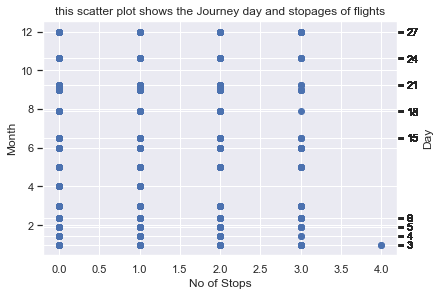

In [69]:
fig, ax = plt.subplots(constrained_layout=True)
month=list(df['Month_of_Journey'])
stopages=list(df["Total_Stops"])
day=list(df['Day_of_Journey'])
ax2=ax.twinx()
ax.scatter(stopages,month)
ax2.scatter(stopages,day)
ax.set_xlabel('No of Stops')
ax.set_ylabel('Month')
ax2.set_ylabel('Day')
plt.xticks(rotation=90,size=10)
plt.title("this scatter plot shows the Journey day and stopages of flights")
plt.yticks(day)
plt.show()

In [29]:
df.loc[df['Total_Stops']==4]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
9182,Air India,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,2022-01-22 05:50:00,2022-03-02 11:20:00,29h 30m,4,Change airports,17686,3,1


In [30]:
df.loc[df['Total_Stops']==3]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
402,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2022-01-22 05:15:00,2022-06-16 07:40:00,26h 25m,3,No info,10493,15,6
919,Air India,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,2022-01-22 12:00:00,2022-05-13 23:15:00,35h 15m,3,No info,10991,5,12
1218,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2022-01-22 05:15:00,2022-06-28 07:40:00,26h 25m,3,No info,11543,27,6
1665,Air India,Banglore,New Delhi,BLR → CCU → BBI → HYD → DEL,2022-01-22 05:50:00,2022-03-02 12:15:00,30h 25m,3,No info,12346,3,1
2172,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2022-01-22 05:15:00,2022-05-19 19:15:00,38h,3,No info,10703,18,5
2623,Air India,Mumbai,Hyderabad,BOM → JDH → JAI → DEL → HYD,2022-01-22 09:40:00,2022-03-13 15:15:00,29h 35m,3,No info,18293,3,12
2633,Multiple carriers,Delhi,Cochin,DEL → GWL → IDR → BOM → COK,2022-01-22 11:35:00,2022-01-22 21:00:00,9h 25m,3,No info,21829,3,6
2718,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2022-01-22 05:15:00,2022-03-10 19:15:00,38h,3,No info,15586,3,9
2814,Air India,Banglore,New Delhi,BLR → BOM → IDR → GWL → DEL,2022-01-22 17:25:00,2022-03-13 18:05:00,24h 40m,3,No info,13387,3,12
2822,Air India,Kolkata,Banglore,CCU → DEL → COK → TRV → BLR,2022-01-22 10:00:00,2022-05-25 10:30:00,24h 30m,3,No info,13007,24,5


In [31]:
df.loc[df['Total_Stops']==2]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-22 05:50:00,2022-01-22 13:15:00,7h 25m,2,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-22 09:25:00,2022-06-10 04:25:00,19h,2,No info,13882,6,9
15,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,2022-01-22 16:40:00,2022-03-04 19:15:00,26h 35m,2,No info,14011,3,3
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,2022-01-22 20:15:00,2022-06-13 19:15:00,23h,2,No info,13381,6,12
25,Jet Airways,Delhi,Cochin,DEL → IDR → BOM → COK,2022-01-22 21:25:00,2022-06-10 12:35:00,15h 10m,2,No info,13292,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,2022-01-22 11:40:00,2022-01-22 19:00:00,7h 20m,2,No info,21219,5,9
10670,Air India,Kolkata,Banglore,CCU → IXR → DEL → BLR,2022-01-22 05:50:00,2022-01-22 23:15:00,17h 25m,2,No info,11411,5,12
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2022-01-22 23:05:00,2022-06-28 19:00:00,19h 55m,2,In-flight meal not included,11150,27,6
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2022-01-22 13:25:00,2022-05-28 04:25:00,15h,2,No info,16704,27,5


In [32]:
df.loc[df['Total_Stops']==1]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-22 18:05:00,2022-01-22 23:30:00,5h 25m,1,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-22 16:50:00,2022-01-22 21:35:00,4h 45m,1,No info,13302,3,1
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-01-22 18:55:00,2022-03-13 10:25:00,15h 30m,1,In-flight meal not included,11087,3,12
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-01-22 08:00:00,2022-03-02 05:05:00,21h 5m,1,No info,22270,3,1
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-01-22 08:55:00,2022-03-13 10:25:00,25h 30m,1,In-flight meal not included,11087,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...
10666,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-01-22 18:15:00,2022-06-13 19:00:00,24h 45m,1,In-flight meal not included,10262,6,12
10667,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-01-22 22:55:00,2022-03-13 20:20:00,21h 25m,1,In-flight meal not included,11087,3,12
10669,Air India,Delhi,Cochin,DEL → BOM → COK,2022-01-22 08:00:00,2022-01-22 19:15:00,11h 15m,1,No info,9929,15,6
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-01-22 20:35:00,2022-03-13 21:20:00,24h 45m,1,In-flight meal not included,11087,3,12


In [33]:
df.loc[df['Total_Stops']==0]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-22 22:20:00,2022-03-22 01:10:00,2h 50m,0,No info,3897,24,3
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2022-01-22 09:00:00,2022-01-22 11:25:00,2h 25m,0,No info,3873,24,6
11,IndiGo,Kolkata,Banglore,CCU → BLR,2022-01-22 20:20:00,2022-01-22 22:55:00,2h 35m,0,No info,4174,18,4
12,Air India,Chennai,Kolkata,MAA → CCU,2022-01-22 11:40:00,2022-01-22 13:55:00,2h 15m,0,No info,4667,24,6
14,IndiGo,Kolkata,Banglore,CCU → BLR,2022-01-22 17:15:00,2022-01-22 19:50:00,2h 35m,0,No info,4804,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,BLR → DEL,2022-01-22 05:55:00,2022-01-22 08:35:00,2h 40m,0,No check-in baggage included,3257,21,5
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-01-22 19:55:00,2022-01-22 22:25:00,2h 30m,0,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-01-22 20:45:00,2022-01-22 23:20:00,2h 35m,0,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-01-22 08:20:00,2022-01-22 11:20:00,3h,0,No info,7229,27,4


In [34]:
df['Month_of_Journey'].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

In [35]:
df['Day_of_Journey'].unique()

array([24,  5,  6,  3, 27, 18, 15, 21,  4], dtype=int64)

In [36]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [37]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [38]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [39]:
destination=[]
for i in df['Destination']:
    if i=='New Delhi':
        destination.append(i.replace('New Delhi','Delhi'))
    else:
        destination.append(i)
        

In [40]:
df.drop(columns=['Destination'],inplace=True)

In [41]:
df.head(3)

,Airline,Source,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,BLR → DEL,2022-01-22 22:20:00,2022-03-22 01:10:00,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,CCU → IXR → BBI → BLR,2022-01-22 05:50:00,2022-01-22 13:15:00,7h 25m,2,No info,7662,5,1
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,2022-01-22 09:25:00,2022-06-10 04:25:00,19h,2,No info,13882,6,9


In [42]:
df['Destination']=pd.Series(destination)

In [43]:
df.head()

,Airline,Source,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Destination
0,IndiGo,Banglore,BLR → DEL,2022-01-22 22:20:00,2022-03-22 01:10:00,2h 50m,0,No info,3897,24,3,Delhi
1,Air India,Kolkata,CCU → IXR → BBI → BLR,2022-01-22 05:50:00,2022-01-22 13:15:00,7h 25m,2,No info,7662,5,1,Banglore
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,2022-01-22 09:25:00,2022-06-10 04:25:00,19h,2,No info,13882,6,9,Cochin
3,IndiGo,Kolkata,CCU → NAG → BLR,2022-01-22 18:05:00,2022-01-22 23:30:00,5h 25m,1,No info,6218,5,12,Banglore
4,IndiGo,Banglore,BLR → NAG → DEL,2022-01-22 16:50:00,2022-01-22 21:35:00,4h 45m,1,No info,13302,3,1,Delhi


In [44]:
cols=df.columns.tolist()
cols

['Airline',
 'Source',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Day_of_Journey',
 'Month_of_Journey',
 'Destination']

In [45]:
cols=cols[0:3]+cols[-1:]+cols[3:11]


In [46]:
cols

['Airline',
 'Source',
 'Route',
 'Destination',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Day_of_Journey',
 'Month_of_Journey']

In [47]:
df=df[cols]

In [48]:
df.head(3)

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,BLR → DEL,Delhi,2022-01-22 22:20:00,2022-03-22 01:10:00,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,CCU → IXR → BBI → BLR,Banglore,2022-01-22 05:50:00,2022-01-22 13:15:00,7h 25m,2,No info,7662,5,1
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,Cochin,2022-01-22 09:25:00,2022-06-10 04:25:00,19h,2,No info,13882,6,9


In [49]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

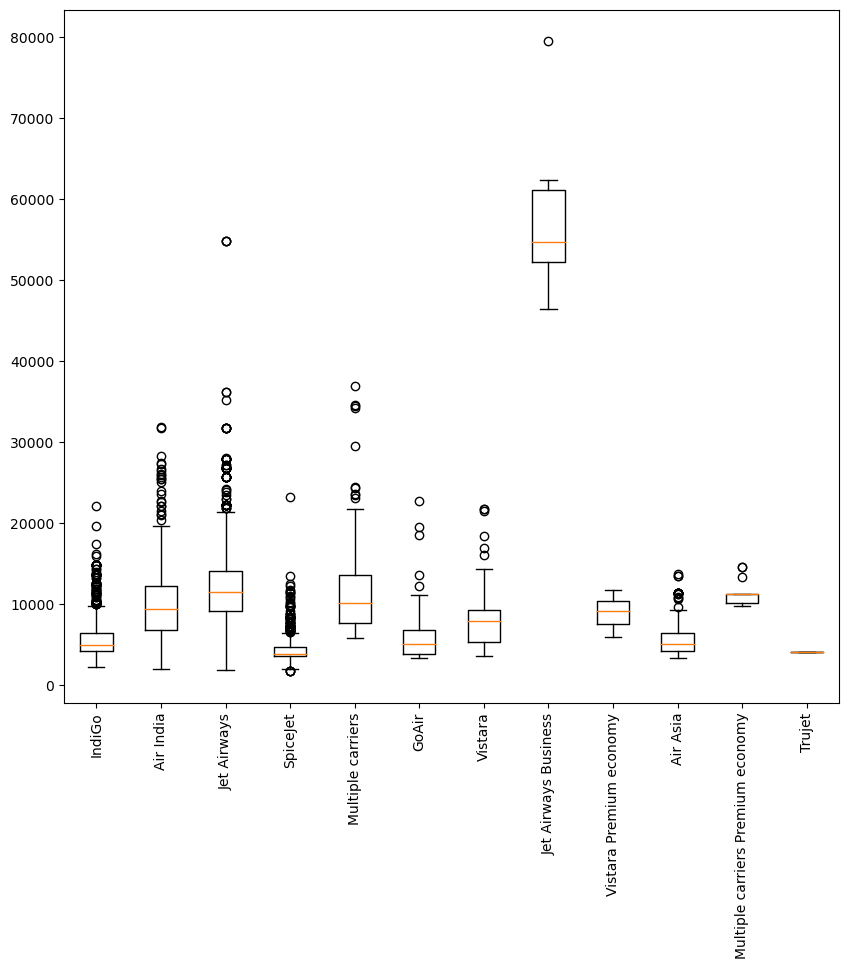

In [72]:
indigo=df.loc[df['Airline']=='IndiGo']["Price"]
air_india=df.loc[df['Airline']=='Air India']['Price']
jet_airways=df.loc[df['Airline']=='Jet Airways']["Price"]
spicejet=df.loc[df['Airline']=='SpiceJet']['Price']
multiple_carriers=df.loc[df['Airline']=='Multiple carriers']["Price"]
go_air=df.loc[df['Airline']=='GoAir']['Price']
vistara=df.loc[df['Airline']=='Vistara']['Price']
jet_airways_business=df.loc[df['Airline']=='Jet Airways Business']["Price"]
vistara_premium_economy=df.loc[df['Airline']=='Vistara Premium economy']['Price']
air_asia=df.loc[df['Airline']=='Air Asia']['Price']
multiple_carriers_premium_economy=df.loc[df['Airline']=='Multiple carriers Premium economy']["Price"]
trujet=df.loc[df['Airline']=='Trujet']['Price']

labels=['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet','Multiple carriers', 'GoAir', 'Vistara', 'Jet Airways Business', 'Vistara Premium economy','Air Asia','Multiple carriers Premium economy', 'Trujet']
plt.xlabel=('Airlines')

plt.ylabel=('Prices')
plt.style.use('default')
plt.figure(figsize=[10,9])
boxes=plt.boxplot([indigo,air_india,jet_airways,spicejet,multiple_carriers,go_air,vistara,jet_airways_business,vistara_premium_economy,air_asia,multiple_carriers_premium_economy,trujet],labels=labels)


plt.xticks(rotation=90)

plt.show()

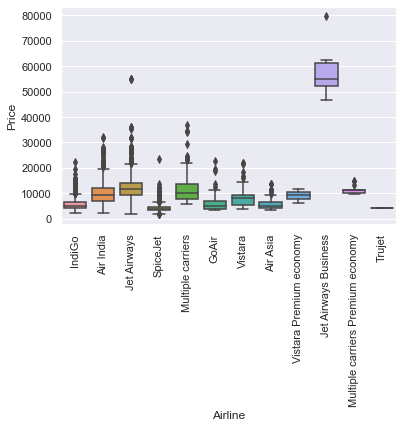

In [51]:
sns.boxplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=90,size=11)
plt.show()

In [52]:
df.loc[df['Airline']=='Trujet']

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
2878,Trujet,Mumbai,BOM → NDC → HYD,Hyderabad,2022-01-22 13:05:00,2022-01-22 16:20:00,3h 15m,1,No info,4140,3,6


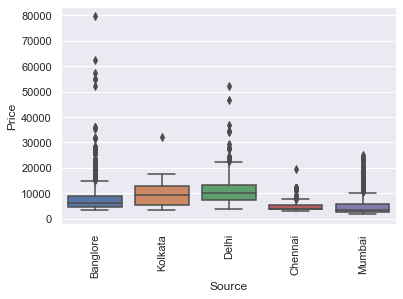

In [53]:
sns.boxplot(x='Source',y='Price',data=df)
plt.xticks(rotation=90,size=11)
plt.show()

In [54]:
df.loc[df['Airline']=='Jet Airways Business']

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
657,Jet Airways Business,Banglore,BLR → BOM → DEL,Delhi,2022-01-22 05:45:00,2022-01-22 10:45:00,5h,1,No info,52229,3,1
2924,Jet Airways Business,Banglore,BLR → BOM → DEL,Delhi,2022-01-22 05:45:00,2022-01-22 11:25:00,5h 40m,1,Business class,79512,3,1
5372,Jet Airways Business,Banglore,BLR → BOM → DEL,Delhi,2022-01-22 05:45:00,2022-01-22 12:25:00,6h 40m,1,Business class,62427,3,1
7351,Jet Airways Business,Delhi,DEL → ATQ → BOM → COK,Cochin,2022-01-22 20:05:00,2022-03-04 04:25:00,8h 20m,2,No info,46490,3,3
9715,Jet Airways Business,Delhi,DEL → ATQ → BOM → COK,Cochin,2022-01-22 20:05:00,2022-03-07 04:25:00,8h 20m,2,No info,52285,3,6
10364,Jet Airways Business,Banglore,BLR → MAA → DEL,Delhi,2022-01-22 09:45:00,2022-01-22 14:25:00,4h 40m,1,Business class,57209,3,1


In [55]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [68]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [67]:
df.groupby(['Source','Destination','Airline']).all()

Route  Dep_Time  \
Source   Destination Airline                                              
Banglore Delhi       Air Asia                            True      True   
                     Air India                           True      True   
                     GoAir                               True      True   
                     IndiGo                              True      True   
                     Jet Airways                         True      True   
                     Jet Airways Business                True      True   
                     SpiceJet                            True      True   
                     Vistara                             True      True   
                     Vistara Premium economy             True      True   
Chennai  Kolkata     Air India                           True      True   
                     IndiGo                              True      True   
                     SpiceJet                            True      True   
                     Vistara                             True      True   
                     Vistara Premium economy             True      True   
Delhi    Cochin      Air Asia                            True      True   
                     Air India                           True      True   
                     GoAir                               True      True   
                     IndiGo                              True      True   
                     Jet Airways                         True      True   
                     Jet Airways Business                True      True   
                     Multiple carriers                   True      True   
                     Multiple carriers Premium economy   True      True   
                     SpiceJet                            True      True   
                     Vistara                             True      True   
Kolkata  Banglore    Air Asia                            True      True   
                     Air India                           True      True   
                     GoAir                               True      True   
                     IndiGo                              True      True   
                     Jet Airways                         True      True   
                     SpiceJet                            True      True   
                     Vistara                             True      True   
Mumbai   Hyderabad   Air India                           True      True   
                     IndiGo                              True      True   
                     Jet Airways                         True      True   
                     SpiceJet                            True      True   
                     Trujet                              True      True   
                     Vistara                             True      True   

                                                        Arrival_Time  \
Source   Destination Airline                                           
Banglore Delhi       Air Asia                                   True   
                     Air India                                  True   
                     GoAir                                      True   
                     IndiGo                                     True   
                     Jet Airways                                True   
                     Jet Airways Business                       True   
                     SpiceJet                                   True   
                     Vistara                                    True   
                     Vistara Premium economy                    True   
Chennai  Kolkata     Air India                                  True   
                     IndiGo                                     True   
                     SpiceJet                                   True   
                     Vistara                                    True   
                     Vistara Premium economy      